# Run models and create submissions

## I) imports

In [13]:
from proj1_helpers import *
from custom_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## II) Required functions

In [32]:
def train_model(y_train, x_train, flag_method, max_iter=0, gamma=0, lambda_=0): 
    """Train a model on a given subset of the data. Choose method by setting flag_method"""

    initial_w = np.ones(x_train.shape[1])

    if flag_method == 0:
        # Use linear regression (full gradient descent)
        weight, loss_tr = least_squares_GD(y_train, x_train, initial_w, max_iters, gamma)
            
    if flag_method == 1:
        # Use linear regression (stochastic gradient descent)
        weight, loss_tr = least_squares_SGD(y_train, x_train, initial_w, max_iters, gamma)
        
    if flag_method == 2:
        # Use least squares method
        weight, loss_tr = least_squares(y_train, x_train)
            
    if flag_method == 3:
        # Use ridge regression
        weight, loss_tr = ridge_regression(y_train, x_train, lambda_)
           
    if flag_method == 4:
        # Use logistic regression
        weight, loss_tr = logistic_regression_SGD(y_train, x_train, initial_w, max_iters, gamma)
            
    if flag_method == 5:
        # Use regularized logistic regression
        weight, loss_tr = reg_logistic_regression_SGD(y_train, x_train, initial_w, max_iters, gamma, lambda_)
        
    return weight

## III) Load data

In [3]:
# Load Data
print("Loading Data, please wait")
y_test, x_test_raw, ids_test = load_csv_data('data/test.csv')
y_train, x_train_raw, ids_train = load_csv_data('data/train.csv')
print("Data loaded, continue!!")

Loading Data, please wait
Data loaded, continue!!


In [10]:
w = np.ones((x_train_raw.shape[1], 1))
a = x_train_raw.dot(w)

## IV) Train Model on the training set and make predictions on the testset
Chose from the following methods:

In [4]:
"""
Methods mapping
0    Linear regression (full gradient descent)
1    Linear regression (stochastic gradient descent)
2    Least squares method
3    Ridge regression
4    Logistic regression (stochastic gradient descent)
5    Regularized logistic regression (stochastic gradient descent)
"""

'\nMethods mapping\n0    Linear regression (full gradient descent)\n1    Linear regression (stochastic gradient descent)\n2    Least squares method\n3    Ridge regression\n4    Logistic regression (stochastic gradient descent)\n5    Regularized logistic regression (stochastic gradient descent)\n'

### Train one model only

In [33]:
# Choose feature treatment methods
flag_add_offset = True
flag_standardize = True
flag_remove_outliers = False
degree = 1

# Choose training model to apply (see mapping above)
flag_method = 0

# Set training parameters
max_iters = 200
gamma = 0.0001
lambda_ = 0.0

# Prepare data
print("Preparing data...")
x_train, x_test = prepare_data(x_train_raw, x_test_raw, flag_add_offset, flag_standardize, flag_remove_outliers, degree)
# Train model
print("Training starts...")
weight = train_model(y_train, x_train, flag_method, max_iters, gamma, lambda_)
print("Training done!")

# Make predictions
pred_y = predict_labels(weight, x_test)
ids_pred_y = ids_test
print("Predictions ready. You can now write them to a file")

Preparing data...
Training starts...
iteration	 0 	loss:  0.33902092820765006
iteration	 50 	loss:  16.258455132329114
iteration	 100 	loss:  15.073184277914963
iteration	 150 	loss:  14.10181018250668
Training done!
Predictions ready. You can now write them to a file


### Train a seperate model for each of the jets

Cleaning and preparing data for jet number 0
hallo
[ 1.         -0.69213373  1.23570368  0.03328938  0.80134409 -0.52103958
 -0.64900532 -0.52103958  0.67172229 -0.68496537 -0.74924397 -0.11322418
 -0.73126394 -0.78652887  0.06915481 -0.75518211 -0.72416656 -0.42151066
 -0.68188984  3.15038728]
Training model for jet number 0...
iteration	 0 	loss:  0.008315374427453493


SystemError: <built-in method write of _io.BufferedWriter object at 0x7fd75fe2c9e8> returned a result with an error set

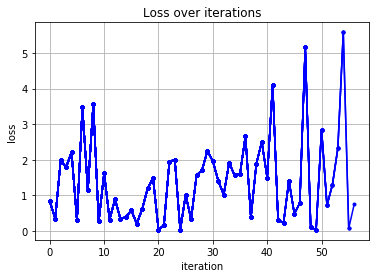

In [21]:
# Choose feature treatment methods
flag_add_offset = True
flag_standardize = True
flag_remove_outliers = True
degree = 1

# Choose training model to apply (see mapping above)
flag_method = 5

# Set training parameters
max_iters = 200
gamma = 0.000001
lambda_ = 0.0


# In the dateset, we found that the Column[22] PRI_jet_num dataset is categorical with Four categories defined.column_jet_nb = 22
pred_y = []
ids_pred_y = []
column_categorical=22
# In the paper where describes the differente features of the data, explains that different columns are invalid values
# depending on the value of the categorical feature, so we can delete those values for the 4 different trainings
#The undefined features, with first vector for the categorical value of 0, and so on.
undefined_features = [[4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29], [4, 5, 6, 12, 22, 26, 27, 28], [22], [22]]

#We will have a for loop with 4 values for the 4 categorical training
for nb_jets in range(0, 1):
    print("Cleaning and preparing data for jet number %d" %nb_jets)
    # We will separate select data according to the value of the categorical values for each loop in our cicle
    jet_index_test = x_test_raw[:, column_categorical] == nb_jets
    x_test_jet = x_test_raw[jet_index_test]
    #y_test_jet = y_test[jet_index_test]
    id_test_jet = ids_test[jet_index_test]
    jet_index_train = x_train_raw[:, column_categorical] == nb_jets
    x_train_jet = x_train_raw[jet_index_train]
    y_train_jet = y_train[jet_index_train]
    id_train_jet = ids_train[jet_index_train]
    
    #remove undefined features
    x_test_jet = np.delete(x_test_jet, undefined_features[nb_jets], axis=1)
    x_train_jet = np.delete(x_train_jet, undefined_features[nb_jets], axis=1)
       
    # Prepare data
    x_train_jet, x_test_jet = prepare_data(x_train_jet, x_test_jet, flag_add_offset, flag_standardize, flag_remove_outliers, degree)
  
    print(x_train_jet[4, :])
    print("Training model for jet number %d..." %nb_jets)
    # train the chosen model
    weight = train_model(y_train_jet, x_train_jet, flag_method, max_iters, gamma, lambda_)
    
    print("making predictions for jet number %d..." %nb_jets)
    # Now we get the prediction for y
    pred_y_jet = predict_labels(weight, x_test_jet)
    pred_y.extend(pred_y_jet)
    ids_pred_y.extend(id_test_jet) 

print("Finished training all four models. Predictions are ready to be written to file")

## V) Create submission file

In [44]:
# Choose filename:
filename = "submissionX.csv"

print("Creating submission file.")
create_csv_submission(ids_pred_y, pred_y, filename)
print("Created submission file!")

Creating submission file.
Created submission file!


In [ ]:
"""
TODO:   fine-tune hyperparameters to make better submission
        Run with less feature engineering to prove that our choices improve the result


"""